In [2]:
import sys
sys.path.insert(0,'..')

from src.models import *
from src.loss_functions import *
from src.noise import *
from src.metrics import *
from src.plotting import *
from src.generate_data import *
from src.toy_data import *

import sklearn
import pandas as pd

from scipy.stats import bernoulli

from operator import xor

In [3]:
torch.cuda.device_count()

1

In [ ]:
m = 100  # number of models
max_iter = 10000
d = 2  # number of dimensions
noise_type = "class_independent"

# Define the deterministic labels for each (x1, x2) pair
true_labels = {
    (0, 0): 0,
    (0, 1): 0,
    (1, 0): 1,
    (1, 1): 1
}

# Define the number of instances for each (x1, x2) pair
instances_counts = {
    (0, 0): 10,
    (0, 1): 10,
    (1, 0): 10,
    (1, 1): 10
}


p_y_x_dict = calculate_priors(true_labels, instances_counts)


X, y = generate_dataset(true_labels, instances_counts)
X_test = np.concatenate((X, np.array(list(true_labels.keys()))))
y_test = np.concatenate((y, np.array(list(true_labels.values()))))

p_y_x_dict

In [ ]:
noise_levels = np.linspace(0.0, 0.45, num=10)


ambiguity_rates, disagreement_rates = generate_metrics_toy(noise_levels,m,max_iter, d, X, y, X_test, y_test, true_labels, instances_counts, p_y_x_dict = p_y_x_dict, noise_type = noise_type)


/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/matplotlib/cbook.py:1261: RuntimeWarning: invalid value encountered in scalar multiply
  loval = q1 - whis * stats['iqr']
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/matplotlib/cbook.py:1262: RuntimeWarning: invalid value encountered in scalar multiply
  hival = q3 + whis * stats['iqr']
/fs01/home/snagaraj/noise_multiplicity/src/../src/plotting.py:362: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x="Noise Level (%)", y="Rate (%)", hue="Instance", data=df, jitter=True, dodge=False, palette=colors, size=6, linewidth=0.5, edgecolor='gray', ax=ax)


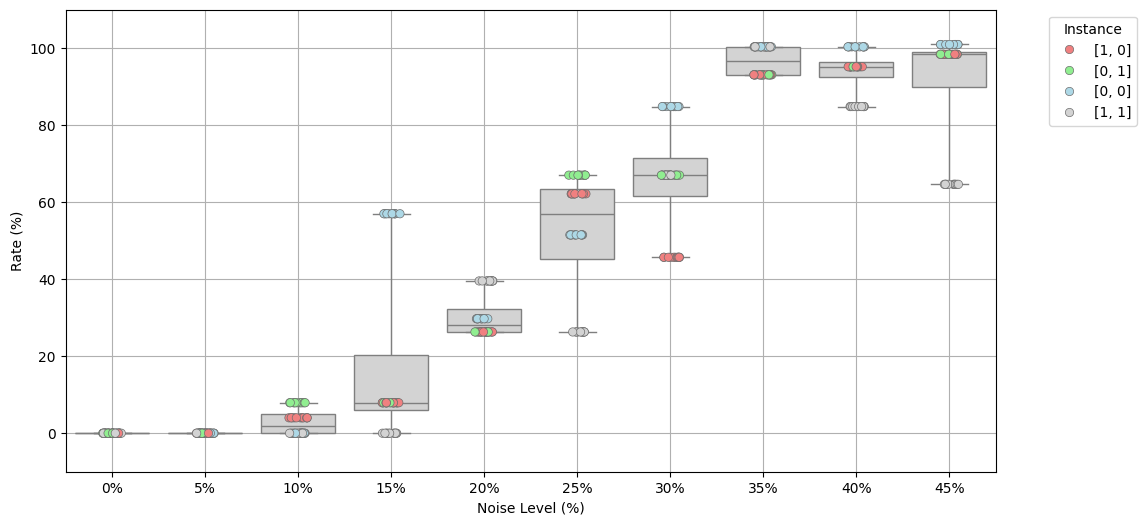

In [4]:
plot_metrics_boxplot(disagreement_rates, X_test)

In [2]:
m = 100 # number of models
max_iter = 10000
d = 2  # number of dimensions
noise_type = "class_conditional"

fixed_class = 1
fixed_noise = 0.0

# Define the deterministic labels for each (x1, x2) pair
true_labels = {
    (0, 0): 0,
    (0, 1): 0,
    (1, 0): 1,
    (1, 1): 1
}

# Define the number of instances for each (x1, x2) pair
instances_counts = {
    (0, 0): 15,
    (0, 1): 15,
    (1, 0): 25,
    (1, 1): 25
}

p_y_x_dict = calculate_priors(true_labels, instances_counts)


X, y = generate_dataset(true_labels, instances_counts)
X_test = np.concatenate((X, np.array(list(true_labels.keys()))))
y_test = np.concatenate((y, np.array(list(true_labels.values()))))

p_y_x_dict

{(0, 0): array([0.375, 0.625]),
 (0, 1): array([0.375, 0.625]),
 (1, 0): array([0.375, 0.625]),
 (1, 1): array([0.375, 0.625])}

In [3]:
T = np.array([[1-0.1, 0.1], [fixed_noise, 1-fixed_noise]])
T

array([[0.9, 0.1],
       [0. , 1. ]])

In [4]:
noise_levels = np.linspace(0.1, 0.49, num=20)

print(noise_levels)

ambiguity_rates, disagreement_rates = generate_metrics_toy(noise_levels, m, max_iter, d, X, y, X_test, y_test, true_labels, instances_counts,  p_y_x_dict = p_y_x_dict, noise_type= noise_type, fixed_class = fixed_class, fixed_noise=fixed_noise)
#plot_metrics_toy(ambiguity_rates, noise_levels)

[0.1        0.12052632 0.14105263 0.16157895 0.18210526 0.20263158
 0.22315789 0.24368421 0.26421053 0.28473684 0.30526316 0.32578947
 0.34631579 0.36684211 0.38736842 0.40789474 0.42842105 0.44894737
 0.46947368 0.49      ]


  0%|          | 0/20 [00:00<?, ?it/s]

0.025 0.037500000000000006 0.1
0.05 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.0625 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.0125 0.037500000000000006 0.1
0.05 0.037500000000000006 0.1
0.0125 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.05 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.0125 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.05 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.0125 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.0125 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.0125 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.025 0.037500000000000006 

0.025 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.05 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.05 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.05 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.05 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.05 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.0125 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.0125 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.0375 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1
0.025 0.037500000000000006 0.1


0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.0451973684

0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0

0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0

0.05 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.

0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.0451973684210526

0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.120

0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263

0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.120526

0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 

0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.1205

0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.1

0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.1

0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.120526

0.0875 0.04519736842105263 0.12052631578947369
0.1 0.04519736842105263 0.12052631578947369
0.1 0.04519736842105263 0.12052631578947369
0.1 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.1125 0.04519736842105263 0.12052631578947369
0.1125 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.1 0.04519736842105263 0.12052631578947369
0.1 0.04519736842105263 0.12052631578947369
0.1 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.1 0.04519736842105263 0.12052631578947369
0.1125 0.04519736842105263 0.12052631578947369
0.1 0.04519736842105263 0.12052631578947369
0.1 0.04519736842105263 0.12052631578947369
0.1125 0.04519736842105263 0.12052631578947369
0.1375 0.04519736842105263 0.12052631578947369
0.1125 0.04519736842105263 0.12052631578947369
0.125 0.04519736842105263 0.12052631578947369
0.1125 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947

0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.0451973684210526

0.0625 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105

0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.1205263

0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052

0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.

0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.1205263

0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12

0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12

0.0125 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.1

0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.1205263157

0.0875 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.1 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.045197368421052

0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.1 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.

0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.1125 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 

0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 

0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.1

0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052

0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12

0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0

0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.1205

0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.1 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.1

0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.120526

0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12

0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.045197368421

0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 

0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.

0.025 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.1

0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.120

0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 

0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.1205

0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.075 0.04519736842105263 0.12052631578947369
0.0875 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.0451973684210526

0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.1205

0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0

0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.0625 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.05 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.1

0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0125 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.025 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.04519736842105263 0.12052631578947369
0.0375 0.045197368421052

0.05 0.05289473684210526 0.14105263157894737
0.025 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.0625 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.0125 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.0125 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.025 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.141052

0.025 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.0125 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.0125 0.05289473684210526 0.14105263157894737
0.025 0.05289473684210526 0.14105263157894737
0.025 0.05289473684210526 0.14105263157894737
0.025 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.0625 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.025 0.05289473684210526 0.1

0.0625 0.05289473684210526 0.14105263157894737
0.025 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.0125 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.025 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.025 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.0625 0.05289473684210526 0.14105263157894737
0.0125 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.0375 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.05 0.05289473684210526 0.14105263157894737
0.24875621890547264
0.0625 0.06059210526315789 0.16157894736842104
0.0875 0.06059210526315789 0.16157894736842104
0.0875 0.06059210526315789 0.16157894736842104
0.0875 0

0.05 0.06059210526315789 0.16157894736842104
0.0625 0.06059210526315789 0.16157894736842104
0.0375 0.06059210526315789 0.16157894736842104
0.0625 0.06059210526315789 0.16157894736842104
0.0625 0.06059210526315789 0.16157894736842104
0.0375 0.06059210526315789 0.16157894736842104
0.0625 0.06059210526315789 0.16157894736842104
0.0625 0.06059210526315789 0.16157894736842104
0.05 0.06059210526315789 0.16157894736842104
0.05 0.06059210526315789 0.16157894736842104
0.0375 0.06059210526315789 0.16157894736842104
0.075 0.06059210526315789 0.16157894736842104
0.05 0.06059210526315789 0.16157894736842104
0.05 0.06059210526315789 0.16157894736842104
0.05 0.06059210526315789 0.16157894736842104
0.075 0.06059210526315789 0.16157894736842104
0.05 0.06059210526315789 0.16157894736842104
0.05 0.06059210526315789 0.16157894736842104
0.0125 0.06059210526315789 0.16157894736842104
0.05 0.06059210526315789 0.16157894736842104
0.025 0.06059210526315789 0.16157894736842104
0.025 0.06059210526315789 0.161578

0.0375 0.06059210526315789 0.16157894736842104
0.0125 0.06059210526315789 0.16157894736842104
0.05 0.06059210526315789 0.16157894736842104
0.075 0.06059210526315789 0.16157894736842104
0.0375 0.06059210526315789 0.16157894736842104
0.05 0.06059210526315789 0.16157894736842104
0.0375 0.06059210526315789 0.16157894736842104
0.05 0.06059210526315789 0.16157894736842104
0.0375 0.06059210526315789 0.16157894736842104
0.0625 0.06059210526315789 0.16157894736842104
0.0375 0.06059210526315789 0.16157894736842104
0.0625 0.06059210526315789 0.16157894736842104
0.0375 0.06059210526315789 0.16157894736842104
0.0625 0.06059210526315789 0.16157894736842104
0.0125 0.06059210526315789 0.16157894736842104
0.0625 0.06059210526315789 0.16157894736842104
0.05 0.06059210526315789 0.16157894736842104
0.0625 0.06059210526315789 0.16157894736842104
0.0375 0.06059210526315789 0.16157894736842104
0.05 0.06059210526315789 0.16157894736842104
0.0375 0.06059210526315789 0.16157894736842104
0.075 0.0605921052631578

0.0625 0.06828947368421052 0.18210526315789474
0.0625 0.06828947368421052 0.18210526315789474
0.05 0.06828947368421052 0.18210526315789474
0.0625 0.06828947368421052 0.18210526315789474
0.0625 0.06828947368421052 0.18210526315789474
0.05 0.06828947368421052 0.18210526315789474
0.05 0.06828947368421052 0.18210526315789474
0.075 0.06828947368421052 0.18210526315789474
0.075 0.06828947368421052 0.18210526315789474
0.0875 0.06828947368421052 0.18210526315789474
0.0625 0.06828947368421052 0.18210526315789474
0.075 0.06828947368421052 0.18210526315789474
0.0875 0.06828947368421052 0.18210526315789474
0.075 0.06828947368421052 0.18210526315789474
0.0625 0.06828947368421052 0.18210526315789474
0.075 0.06828947368421052 0.18210526315789474
0.0625 0.06828947368421052 0.18210526315789474
0.075 0.06828947368421052 0.18210526315789474
0.075 0.06828947368421052 0.18210526315789474
0.05 0.06828947368421052 0.18210526315789474
0.1 0.06828947368421052 0.18210526315789474
0.05 0.06828947368421052 0.1821

0.0625 0.07598684210526316 0.20263157894736844
0.05 0.07598684210526316 0.20263157894736844
0.0375 0.07598684210526316 0.20263157894736844
0.05 0.07598684210526316 0.20263157894736844
0.05 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.0375 0.07598684210526316 0.20263157894736844
0.075 0.07598684210526316 0.20263157894736844
0.05 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.0375 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.075 0.07598684210526316 0.20263157894736844
0.075 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.075 0.07598684210526316 0.20263157894736844
0.05 0.07598684210526316 0.20263157894736844
0.075 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.075 0.07598684210526316 0.20263157894736844
0.0875 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.

0.0625 0.07598684210526316 0.20263157894736844
0.075 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.075 0.07598684210526316 0.20263157894736844
0.05 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.075 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.025 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.05 0.07598684210526316 0.20263157894736844
0.0875 0.07598684210526316 0.20263157894736844
0.0875 0.07598684210526316 0.20263157894736844
0.075 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.0625 0.07598684210526316 0.20263157894736844
0.0625 0.0759868421052

0.05 0.08368421052631579 0.2231578947368421
0.075 0.08368421052631579 0.2231578947368421
0.075 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.05 0.08368421052631579 0.2231578947368421
0.05 0.08368421052631579 0.2231578947368421
0.05 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.0375 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.075 0.08368421052631579 0.2231578947368421
0.0125 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.05 0.08368421052631579 0.2231578947368421
0.075 0.08368421052631579 0.2231578947368421
0.075 0.08368421052631579 0.2231578947368421
0.0375 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.0

0.0625 0.08368421052631579 0.2231578947368421
0.025 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.05 0.08368421052631579 0.2231578947368421
0.0375 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.0375 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.05 0.08368421052631579 0.2231578947368421
0.025 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.0375 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.05 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.075 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421
0.0375 0.08368421052631579 0.2231578947368421
0.05 0.08368421052631579 0.2231578947368421
0.0625 0.08368421052631579 0.2231578947368421

0.05 0.08368421052631579 0.2231578947368421
0.1125 0.08368421052631579 0.2231578947368421
0.1125 0.08368421052631579 0.2231578947368421
0.1 0.08368421052631579 0.2231578947368421
0.075 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.1 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.1 0.08368421052631579 0.2231578947368421
0.075 0.08368421052631579 0.2231578947368421
0.1125 0.08368421052631579 0.2231578947368421
0.1 0.08368421052631579 0.2231578947368421
0.075 0.08368421052631579 0.2231578947368421
0.075 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.0375 0.08368421052631579 0.2231578947368421
0.0375 0.08368421052631579 0.2231578947368421
0.075 0.08368421052631579 0.2231578947368421
0.075 0.08368421052631579 0.2231578947368421
0.025 0.08368421052631579 0.2231578947368421
0.05 0.08

0.0875 0.08368421052631579 0.2231578947368421
0.125 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.1125 0.08368421052631579 0.2231578947368421
0.125 0.08368421052631579 0.2231578947368421
0.1125 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.125 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.1125 0.08368421052631579 0.2231578947368421
0.1 0.08368421052631579 0.2231578947368421
0.1125 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.075 0.08368421052631579 0.2231578947368421
0.1125 0.08368421052631579 0.2231578947368421
0.1 0.08368421052631579 0.2231578947368421
0.1125 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.2231578947368421
0.0875 0.08368421052631579 0.223157894736842

0.0875 0.09138157894736842 0.2436842105263158
0.075 0.09138157894736842 0.2436842105263158
0.1 0.09138157894736842 0.2436842105263158
0.1 0.09138157894736842 0.2436842105263158
0.1125 0.09138157894736842 0.2436842105263158
0.125 0.09138157894736842 0.2436842105263158
0.1125 0.09138157894736842 0.2436842105263158
0.1125 0.09138157894736842 0.2436842105263158
0.1 0.09138157894736842 0.2436842105263158
0.1125 0.09138157894736842 0.2436842105263158
0.1 0.09138157894736842 0.2436842105263158
0.0875 0.09138157894736842 0.2436842105263158
0.1125 0.09138157894736842 0.2436842105263158
0.0875 0.09138157894736842 0.2436842105263158
0.0875 0.09138157894736842 0.2436842105263158
0.0875 0.09138157894736842 0.2436842105263158
0.1125 0.09138157894736842 0.2436842105263158
0.0875 0.09138157894736842 0.2436842105263158
0.0875 0.09138157894736842 0.2436842105263158
0.0875 0.09138157894736842 0.2436842105263158
0.1125 0.09138157894736842 0.2436842105263158
0.125 0.09138157894736842 0.2436842105263158
0.0

0.05 0.09907894736842104 0.26421052631578945
0.05 0.09907894736842104 0.26421052631578945
0.0375 0.09907894736842104 0.26421052631578945
0.0375 0.09907894736842104 0.26421052631578945
0.075 0.09907894736842104 0.26421052631578945
0.05 0.09907894736842104 0.26421052631578945
0.0625 0.09907894736842104 0.26421052631578945
0.0625 0.09907894736842104 0.26421052631578945
0.075 0.09907894736842104 0.26421052631578945
0.05 0.09907894736842104 0.26421052631578945
0.0625 0.09907894736842104 0.26421052631578945
0.0625 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.0625 0.09907894736842104 0.26421052631578945
0.05 0.09907894736842104 0.26421052631578945
0.075 0.09907894736842104 0.26421052631578945
0.075 0.09907894736842104 0.26421052631578945
0.075 0.09907894736842104 0.26421052631578945
0.05 0.09907894736842104 0.26421052631578945
0.075 0.09907894736842104 0.26421052631578945
0.05 0.09907894736842104 0.26421052631578945
0.0625 0.09907894736842104 0.2642

0.0875 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.075 0.09907894736842104 0.26421052631578945
0.1125 0.09907894736842104 0.26421052631578945
0.0625 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.075 0.09907894736842104 0.26421052631578945
0.125 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.1125 0.09907894736842104 0.26421052631578945
0.125 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.1125 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.1125 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.

0.0875 0.09907894736842104 0.26421052631578945
0.075 0.09907894736842104 0.26421052631578945
0.075 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.075 0.09907894736842104 0.26421052631578945
0.075 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.1375 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.1125 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.125 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.2642105263157

0.0875 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.1125 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.075 0.09907894736842104 0.26421052631578945
0.0625 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.05 0.09907894736842104 0.26421052631578945
0.0875 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.075 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.15 0.09907894736842104 0.26421052631578945
0.1 0.09907894736842104 0.26421052631578945
0.125 0.09907894736842104 0.26421052631578945
0.1125 0.09907894736842104 0.26421052631578945
0.1375 0.09907894736842104 0.26421052631578945
0.1125 0.09907894736842104 0.26421052631578945
0.1125 0.09907894736842104 0.26421052631578945
0.15 0.09907894736842104 0.26421052631578945
0.125 0.09907894736842104 0.264210526315

0.1125 0.10677631578947369 0.2847368421052632
0.0875 0.10677631578947369 0.2847368421052632
0.1125 0.10677631578947369 0.2847368421052632
0.1375 0.10677631578947369 0.2847368421052632
0.125 0.10677631578947369 0.2847368421052632
0.125 0.10677631578947369 0.2847368421052632
0.125 0.10677631578947369 0.2847368421052632
0.1125 0.10677631578947369 0.2847368421052632
0.125 0.10677631578947369 0.2847368421052632
0.1 0.10677631578947369 0.2847368421052632
0.1 0.10677631578947369 0.2847368421052632
0.1125 0.10677631578947369 0.2847368421052632
0.1 0.10677631578947369 0.2847368421052632
0.1 0.10677631578947369 0.2847368421052632
0.1125 0.10677631578947369 0.2847368421052632
0.0875 0.10677631578947369 0.2847368421052632
0.125 0.10677631578947369 0.2847368421052632
0.1125 0.10677631578947369 0.2847368421052632
0.1125 0.10677631578947369 0.2847368421052632
0.125 0.10677631578947369 0.2847368421052632
0.125 0.10677631578947369 0.2847368421052632
0.125 0.10677631578947369 0.2847368421052632
0.125 0.

0.1125 0.11447368421052631 0.30526315789473685
0.0875 0.11447368421052631 0.30526315789473685
0.125 0.11447368421052631 0.30526315789473685
0.1125 0.11447368421052631 0.30526315789473685
0.125 0.11447368421052631 0.30526315789473685
0.0875 0.11447368421052631 0.30526315789473685
0.0875 0.11447368421052631 0.30526315789473685
0.15 0.11447368421052631 0.30526315789473685
0.1 0.11447368421052631 0.30526315789473685
0.0625 0.11447368421052631 0.30526315789473685
0.1 0.11447368421052631 0.30526315789473685
0.075 0.11447368421052631 0.30526315789473685
0.075 0.11447368421052631 0.30526315789473685
0.0875 0.11447368421052631 0.30526315789473685
0.0625 0.11447368421052631 0.30526315789473685
0.0875 0.11447368421052631 0.30526315789473685
0.075 0.11447368421052631 0.30526315789473685
0.0625 0.11447368421052631 0.30526315789473685
0.0875 0.11447368421052631 0.30526315789473685
0.0625 0.11447368421052631 0.30526315789473685
0.0875 0.11447368421052631 0.30526315789473685
0.1 0.11447368421052631 0.

0.075 0.11447368421052631 0.30526315789473685
0.05 0.11447368421052631 0.30526315789473685
0.0875 0.11447368421052631 0.30526315789473685
0.05 0.11447368421052631 0.30526315789473685
0.075 0.11447368421052631 0.30526315789473685
0.0625 0.11447368421052631 0.30526315789473685
0.05 0.11447368421052631 0.30526315789473685
0.0875 0.11447368421052631 0.30526315789473685
0.0875 0.11447368421052631 0.30526315789473685
0.075 0.11447368421052631 0.30526315789473685
0.075 0.11447368421052631 0.30526315789473685
0.075 0.11447368421052631 0.30526315789473685
0.075 0.11447368421052631 0.30526315789473685
0.0875 0.11447368421052631 0.30526315789473685
0.05 0.11447368421052631 0.30526315789473685
0.0625 0.11447368421052631 0.30526315789473685
0.0625 0.11447368421052631 0.30526315789473685
0.075 0.11447368421052631 0.30526315789473685
0.0375 0.11447368421052631 0.30526315789473685
0.05 0.11447368421052631 0.30526315789473685
0.05 0.11447368421052631 0.30526315789473685
0.0625 0.11447368421052631 0.305

0.1375 0.12217105263157893 0.3257894736842105
0.075 0.12217105263157893 0.3257894736842105
0.1125 0.12217105263157893 0.3257894736842105
0.1375 0.12217105263157893 0.3257894736842105
0.1 0.12217105263157893 0.3257894736842105
0.1 0.12217105263157893 0.3257894736842105
0.1125 0.12217105263157893 0.3257894736842105
0.0875 0.12217105263157893 0.3257894736842105
0.125 0.12217105263157893 0.3257894736842105
0.1125 0.12217105263157893 0.3257894736842105
0.1 0.12217105263157893 0.3257894736842105
0.125 0.12217105263157893 0.3257894736842105
0.1 0.12217105263157893 0.3257894736842105
0.125 0.12217105263157893 0.3257894736842105
0.1125 0.12217105263157893 0.3257894736842105
0.0875 0.12217105263157893 0.3257894736842105
0.1625 0.12217105263157893 0.3257894736842105
0.1125 0.12217105263157893 0.3257894736842105
0.0875 0.12217105263157893 0.3257894736842105
0.0875 0.12217105263157893 0.3257894736842105
0.0875 0.12217105263157893 0.3257894736842105
0.1 0.12217105263157893 0.3257894736842105
0.1 0.1

0.125 0.12217105263157893 0.3257894736842105
0.1125 0.12217105263157893 0.3257894736842105
0.0875 0.12217105263157893 0.3257894736842105
0.0875 0.12217105263157893 0.3257894736842105
0.1125 0.12217105263157893 0.3257894736842105
0.0875 0.12217105263157893 0.3257894736842105
0.1 0.12217105263157893 0.3257894736842105
0.1 0.12217105263157893 0.3257894736842105
0.1 0.12217105263157893 0.3257894736842105
0.0875 0.12217105263157893 0.3257894736842105
0.075 0.12217105263157893 0.3257894736842105
0.0375 0.12217105263157893 0.3257894736842105
0.075 0.12217105263157893 0.3257894736842105
0.0625 0.12217105263157893 0.3257894736842105
0.0625 0.12217105263157893 0.3257894736842105
0.0875 0.12217105263157893 0.3257894736842105
0.0375 0.12217105263157893 0.3257894736842105
0.0625 0.12217105263157893 0.3257894736842105
0.0625 0.12217105263157893 0.3257894736842105
0.0375 0.12217105263157893 0.3257894736842105
0.075 0.12217105263157893 0.3257894736842105
0.05 0.12217105263157893 0.3257894736842105
0.0

0.0875 0.12986842105263158 0.34631578947368424
0.1125 0.12986842105263158 0.34631578947368424
0.075 0.12986842105263158 0.34631578947368424
0.075 0.12986842105263158 0.34631578947368424
0.1 0.12986842105263158 0.34631578947368424
0.125 0.12986842105263158 0.34631578947368424
0.1125 0.12986842105263158 0.34631578947368424
0.075 0.12986842105263158 0.34631578947368424
0.0875 0.12986842105263158 0.34631578947368424
0.1 0.12986842105263158 0.34631578947368424
0.05 0.12986842105263158 0.34631578947368424
0.075 0.12986842105263158 0.34631578947368424
0.1 0.12986842105263158 0.34631578947368424
0.1 0.12986842105263158 0.34631578947368424
0.1 0.12986842105263158 0.34631578947368424
0.0875 0.12986842105263158 0.34631578947368424
0.1125 0.12986842105263158 0.34631578947368424
0.0875 0.12986842105263158 0.34631578947368424
0.1 0.12986842105263158 0.34631578947368424
0.1 0.12986842105263158 0.34631578947368424
0.0875 0.12986842105263158 0.34631578947368424
0.1 0.12986842105263158 0.346315789473684

0.15 0.12986842105263158 0.34631578947368424
0.0875 0.12986842105263158 0.34631578947368424
0.125 0.12986842105263158 0.34631578947368424
0.1125 0.12986842105263158 0.34631578947368424
0.125 0.12986842105263158 0.34631578947368424
0.1125 0.12986842105263158 0.34631578947368424
0.1125 0.12986842105263158 0.34631578947368424
0.1125 0.12986842105263158 0.34631578947368424
0.1125 0.12986842105263158 0.34631578947368424
0.1 0.12986842105263158 0.34631578947368424
0.0875 0.12986842105263158 0.34631578947368424
0.1 0.12986842105263158 0.34631578947368424
0.0875 0.12986842105263158 0.34631578947368424
0.1 0.12986842105263158 0.34631578947368424
0.1 0.12986842105263158 0.34631578947368424
0.0625 0.12986842105263158 0.34631578947368424
0.1 0.12986842105263158 0.34631578947368424
0.0875 0.12986842105263158 0.34631578947368424
0.1125 0.12986842105263158 0.34631578947368424
0.0875 0.12986842105263158 0.34631578947368424
0.0875 0.12986842105263158 0.34631578947368424
0.1 0.12986842105263158 0.346315

0.1375 0.1375657894736842 0.36684210526315786
0.1125 0.1375657894736842 0.36684210526315786
0.1375 0.1375657894736842 0.36684210526315786
0.1125 0.1375657894736842 0.36684210526315786
0.1375 0.1375657894736842 0.36684210526315786
0.125 0.1375657894736842 0.36684210526315786
0.1375 0.1375657894736842 0.36684210526315786
0.1375 0.1375657894736842 0.36684210526315786
0.125 0.1375657894736842 0.36684210526315786
0.1375 0.1375657894736842 0.36684210526315786
0.15 0.1375657894736842 0.36684210526315786
0.1375 0.1375657894736842 0.36684210526315786
0.1375 0.1375657894736842 0.36684210526315786
0.1 0.1375657894736842 0.36684210526315786
0.1375 0.1375657894736842 0.36684210526315786
0.175 0.1375657894736842 0.36684210526315786
0.15 0.1375657894736842 0.36684210526315786
0.15 0.1375657894736842 0.36684210526315786
0.1 0.1375657894736842 0.36684210526315786
0.125 0.1375657894736842 0.36684210526315786
0.175 0.1375657894736842 0.36684210526315786
0.1875 0.1375657894736842 0.36684210526315786
0.162

0.1625 0.14526315789473684 0.3873684210526316
0.175 0.14526315789473684 0.3873684210526316
0.1125 0.14526315789473684 0.3873684210526316
0.1375 0.14526315789473684 0.3873684210526316
0.1625 0.14526315789473684 0.3873684210526316
0.1625 0.14526315789473684 0.3873684210526316
0.1375 0.14526315789473684 0.3873684210526316
0.1625 0.14526315789473684 0.3873684210526316
0.1375 0.14526315789473684 0.3873684210526316
0.175 0.14526315789473684 0.3873684210526316
0.15 0.14526315789473684 0.3873684210526316
0.125 0.14526315789473684 0.3873684210526316
0.175 0.14526315789473684 0.3873684210526316
0.175 0.14526315789473684 0.3873684210526316
0.1625 0.14526315789473684 0.3873684210526316
0.1375 0.14526315789473684 0.3873684210526316
0.1625 0.14526315789473684 0.3873684210526316
0.175 0.14526315789473684 0.3873684210526316
0.15 0.14526315789473684 0.3873684210526316
0.1375 0.14526315789473684 0.3873684210526316
0.1375 0.14526315789473684 0.3873684210526316
0.15 0.14526315789473684 0.3873684210526316


0.1 0.14526315789473684 0.3873684210526316
0.0875 0.14526315789473684 0.3873684210526316
0.0625 0.14526315789473684 0.3873684210526316
0.0625 0.14526315789473684 0.3873684210526316
0.075 0.14526315789473684 0.3873684210526316
0.1 0.14526315789473684 0.3873684210526316
0.1 0.14526315789473684 0.3873684210526316
0.0875 0.14526315789473684 0.3873684210526316
0.1 0.14526315789473684 0.3873684210526316
0.1125 0.14526315789473684 0.3873684210526316
0.0875 0.14526315789473684 0.3873684210526316
0.1125 0.14526315789473684 0.3873684210526316
0.1125 0.14526315789473684 0.3873684210526316
0.1 0.14526315789473684 0.3873684210526316
0.1125 0.14526315789473684 0.3873684210526316
0.0875 0.14526315789473684 0.3873684210526316
0.1 0.14526315789473684 0.3873684210526316
0.1 0.14526315789473684 0.3873684210526316
0.0875 0.14526315789473684 0.3873684210526316
0.0625 0.14526315789473684 0.3873684210526316
0.075 0.14526315789473684 0.3873684210526316
0.0875 0.14526315789473684 0.3873684210526316
0.075 0.145

0.1625 0.1529605263157895 0.4078947368421053
0.15 0.1529605263157895 0.4078947368421053
0.175 0.1529605263157895 0.4078947368421053
0.1625 0.1529605263157895 0.4078947368421053
0.1125 0.1529605263157895 0.4078947368421053
0.1375 0.1529605263157895 0.4078947368421053
0.15 0.1529605263157895 0.4078947368421053
0.1625 0.1529605263157895 0.4078947368421053
0.1375 0.1529605263157895 0.4078947368421053
0.15 0.1529605263157895 0.4078947368421053
0.1875 0.1529605263157895 0.4078947368421053
0.1625 0.1529605263157895 0.4078947368421053
0.15 0.1529605263157895 0.4078947368421053
0.0875 0.1529605263157895 0.4078947368421053
0.15 0.1529605263157895 0.4078947368421053
0.1625 0.1529605263157895 0.4078947368421053
0.15 0.1529605263157895 0.4078947368421053
0.15 0.1529605263157895 0.4078947368421053
0.1625 0.1529605263157895 0.4078947368421053
0.1875 0.1529605263157895 0.4078947368421053
0.125 0.1529605263157895 0.4078947368421053
0.1375 0.1529605263157895 0.4078947368421053
0.125 0.1529605263157895 0

0.1125 0.1529605263157895 0.4078947368421053
0.075 0.1529605263157895 0.4078947368421053
0.0875 0.1529605263157895 0.4078947368421053
0.0875 0.1529605263157895 0.4078947368421053
0.075 0.1529605263157895 0.4078947368421053
0.0875 0.1529605263157895 0.4078947368421053
0.0375 0.1529605263157895 0.4078947368421053
0.1 0.1529605263157895 0.4078947368421053
0.075 0.1529605263157895 0.4078947368421053
0.1 0.1529605263157895 0.4078947368421053
0.1 0.1529605263157895 0.4078947368421053
0.075 0.1529605263157895 0.4078947368421053
0.1 0.1529605263157895 0.4078947368421053
0.1 0.1529605263157895 0.4078947368421053
0.0875 0.1529605263157895 0.4078947368421053
0.1 0.1529605263157895 0.4078947368421053
0.1125 0.1529605263157895 0.4078947368421053
0.1125 0.1529605263157895 0.4078947368421053
0.1 0.1529605263157895 0.4078947368421053
0.0875 0.1529605263157895 0.4078947368421053
0.0875 0.1529605263157895 0.4078947368421053
0.1125 0.1529605263157895 0.4078947368421053
0.075 0.1529605263157895 0.40789473

0.2 0.1529605263157895 0.4078947368421053
0.25 0.1529605263157895 0.4078947368421053
0.225 0.1529605263157895 0.4078947368421053
0.225 0.1529605263157895 0.4078947368421053
0.2 0.1529605263157895 0.4078947368421053
0.2625 0.1529605263157895 0.4078947368421053
0.2375 0.1529605263157895 0.4078947368421053
0.175 0.1529605263157895 0.4078947368421053
0.2 0.1529605263157895 0.4078947368421053
0.2 0.1529605263157895 0.4078947368421053
0.2 0.1529605263157895 0.4078947368421053
0.175 0.1529605263157895 0.4078947368421053
0.2 0.1529605263157895 0.4078947368421053
0.2375 0.1529605263157895 0.4078947368421053
0.2125 0.1529605263157895 0.4078947368421053
0.2 0.1529605263157895 0.4078947368421053
0.25 0.1529605263157895 0.4078947368421053
0.275 0.1529605263157895 0.4078947368421053
0.2375 0.1529605263157895 0.4078947368421053
0.2 0.1529605263157895 0.4078947368421053
0.2375 0.1529605263157895 0.4078947368421053
0.25 0.1529605263157895 0.4078947368421053
0.2375 0.1529605263157895 0.4078947368421053


0.15 0.1606578947368421 0.4284210526315789
0.175 0.1606578947368421 0.4284210526315789
0.1875 0.1606578947368421 0.4284210526315789
0.2 0.1606578947368421 0.4284210526315789
0.1875 0.1606578947368421 0.4284210526315789
0.1875 0.1606578947368421 0.4284210526315789
0.225 0.1606578947368421 0.4284210526315789
0.2 0.1606578947368421 0.4284210526315789
0.1875 0.1606578947368421 0.4284210526315789
0.1875 0.1606578947368421 0.4284210526315789
0.1875 0.1606578947368421 0.4284210526315789
0.1875 0.1606578947368421 0.4284210526315789
0.1625 0.1606578947368421 0.4284210526315789
0.175 0.1606578947368421 0.4284210526315789
0.1875 0.1606578947368421 0.4284210526315789
0.1625 0.1606578947368421 0.4284210526315789
0.1375 0.1606578947368421 0.4284210526315789
0.1875 0.1606578947368421 0.4284210526315789
0.1875 0.1606578947368421 0.4284210526315789
0.1625 0.1606578947368421 0.4284210526315789
0.1875 0.1606578947368421 0.4284210526315789
0.1625 0.1606578947368421 0.4284210526315789
0.1625 0.160657894736

0.1375 0.16835526315789473 0.44894736842105265
0.1625 0.16835526315789473 0.44894736842105265
0.15 0.16835526315789473 0.44894736842105265
0.1375 0.16835526315789473 0.44894736842105265
0.125 0.16835526315789473 0.44894736842105265
0.075 0.16835526315789473 0.44894736842105265
0.125 0.16835526315789473 0.44894736842105265
0.0875 0.16835526315789473 0.44894736842105265
0.125 0.16835526315789473 0.44894736842105265
0.15 0.16835526315789473 0.44894736842105265
0.1375 0.16835526315789473 0.44894736842105265
0.1375 0.16835526315789473 0.44894736842105265
0.0875 0.16835526315789473 0.44894736842105265
0.1 0.16835526315789473 0.44894736842105265
0.125 0.16835526315789473 0.44894736842105265
0.1375 0.16835526315789473 0.44894736842105265
0.1375 0.16835526315789473 0.44894736842105265
0.1375 0.16835526315789473 0.44894736842105265
0.1375 0.16835526315789473 0.44894736842105265
0.1 0.16835526315789473 0.44894736842105265
0.1125 0.16835526315789473 0.44894736842105265
0.1125 0.16835526315789473 0

0.125 0.16835526315789473 0.44894736842105265
0.125 0.16835526315789473 0.44894736842105265
0.1 0.16835526315789473 0.44894736842105265
0.1 0.16835526315789473 0.44894736842105265
0.1 0.16835526315789473 0.44894736842105265
0.1125 0.16835526315789473 0.44894736842105265
0.125 0.16835526315789473 0.44894736842105265
0.125 0.16835526315789473 0.44894736842105265
0.15 0.16835526315789473 0.44894736842105265
0.1375 0.16835526315789473 0.44894736842105265
0.1375 0.16835526315789473 0.44894736842105265
0.1125 0.16835526315789473 0.44894736842105265
0.15 0.16835526315789473 0.44894736842105265
0.125 0.16835526315789473 0.44894736842105265
0.1375 0.16835526315789473 0.44894736842105265
0.125 0.16835526315789473 0.44894736842105265
0.15 0.16835526315789473 0.44894736842105265
0.15 0.16835526315789473 0.44894736842105265
0.15 0.16835526315789473 0.44894736842105265
0.1375 0.16835526315789473 0.44894736842105265
0.15 0.16835526315789473 0.44894736842105265
0.1875 0.16835526315789473 0.44894736842

0.2125 0.16835526315789473 0.44894736842105265
0.2 0.16835526315789473 0.44894736842105265
0.2 0.16835526315789473 0.44894736842105265
0.1375 0.16835526315789473 0.44894736842105265
0.225 0.16835526315789473 0.44894736842105265
0.1625 0.16835526315789473 0.44894736842105265
0.2 0.16835526315789473 0.44894736842105265
0.2125 0.16835526315789473 0.44894736842105265
0.2125 0.16835526315789473 0.44894736842105265
0.1875 0.16835526315789473 0.44894736842105265
0.175 0.16835526315789473 0.44894736842105265
0.2 0.16835526315789473 0.44894736842105265
0.1875 0.16835526315789473 0.44894736842105265
0.1875 0.16835526315789473 0.44894736842105265
0.1625 0.16835526315789473 0.44894736842105265
0.175 0.16835526315789473 0.44894736842105265
0.2125 0.16835526315789473 0.44894736842105265
0.175 0.16835526315789473 0.44894736842105265
0.175 0.16835526315789473 0.44894736842105265
0.1875 0.16835526315789473 0.44894736842105265
0.175 0.16835526315789473 0.44894736842105265
0.1875 0.16835526315789473 0.44

0.1625 0.17605263157894735 0.46947368421052627
0.225 0.17605263157894735 0.46947368421052627
0.225 0.17605263157894735 0.46947368421052627
0.2 0.17605263157894735 0.46947368421052627
0.2 0.17605263157894735 0.46947368421052627
0.2375 0.17605263157894735 0.46947368421052627
0.225 0.17605263157894735 0.46947368421052627
0.2 0.17605263157894735 0.46947368421052627
0.1875 0.17605263157894735 0.46947368421052627
0.2 0.17605263157894735 0.46947368421052627
0.225 0.17605263157894735 0.46947368421052627
0.225 0.17605263157894735 0.46947368421052627
0.1875 0.17605263157894735 0.46947368421052627
0.1875 0.17605263157894735 0.46947368421052627
0.225 0.17605263157894735 0.46947368421052627
0.225 0.17605263157894735 0.46947368421052627
0.2375 0.17605263157894735 0.46947368421052627
0.2375 0.17605263157894735 0.46947368421052627
0.2375 0.17605263157894735 0.46947368421052627
0.225 0.17605263157894735 0.46947368421052627
0.2375 0.17605263157894735 0.46947368421052627
0.2375 0.17605263157894735 0.4694

0.1375 0.18375 0.49
0.175 0.18375 0.49
0.2 0.18375 0.49
0.15 0.18375 0.49
0.1875 0.18375 0.49
0.1875 0.18375 0.49
0.175 0.18375 0.49
0.175 0.18375 0.49
0.1625 0.18375 0.49
0.1625 0.18375 0.49
0.2 0.18375 0.49
0.1625 0.18375 0.49
0.125 0.18375 0.49
0.1625 0.18375 0.49
0.1625 0.18375 0.49
0.1625 0.18375 0.49
0.1625 0.18375 0.49
0.1375 0.18375 0.49
0.1875 0.18375 0.49
0.15 0.18375 0.49
0.15 0.18375 0.49
0.1375 0.18375 0.49
0.1625 0.18375 0.49
0.1625 0.18375 0.49
0.1375 0.18375 0.49
0.1375 0.18375 0.49
0.1375 0.18375 0.49
0.1375 0.18375 0.49
0.1125 0.18375 0.49
0.125 0.18375 0.49
0.1125 0.18375 0.49
0.15 0.18375 0.49
0.1375 0.18375 0.49
0.1125 0.18375 0.49
0.15 0.18375 0.49
0.15 0.18375 0.49
0.1375 0.18375 0.49
0.1375 0.18375 0.49
0.1625 0.18375 0.49
0.125 0.18375 0.49
0.1125 0.18375 0.49
0.1 0.18375 0.49
0.1375 0.18375 0.49
0.125 0.18375 0.49
0.075 0.18375 0.49
0.125 0.18375 0.49
0.125 0.18375 0.49
0.15 0.18375 0.49
0.1125 0.18375 0.49
0.1375 0.18375 0.49
0.15 0.18375 0.49
0.1375 0.18375 

In [12]:
for key in disagreement_rates:
    print(len(disagreement_rates[key]))

84
0
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84


/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/matplotlib/cbook.py:1261: RuntimeWarning: invalid value encountered in scalar multiply
  loval = q1 - whis * stats['iqr']
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/matplotlib/cbook.py:1262: RuntimeWarning: invalid value encountered in scalar multiply
  hival = q3 + whis * stats['iqr']
/fs01/home/snagaraj/noise_multiplicity/src/../src/plotting.py:362: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x="Noise Level (%)", y="Rate (%)", hue="Instance", data=df, jitter=True, dodge=False, palette=colors, size=6, linewidth=0.5, edgecolor='gray', ax=ax)


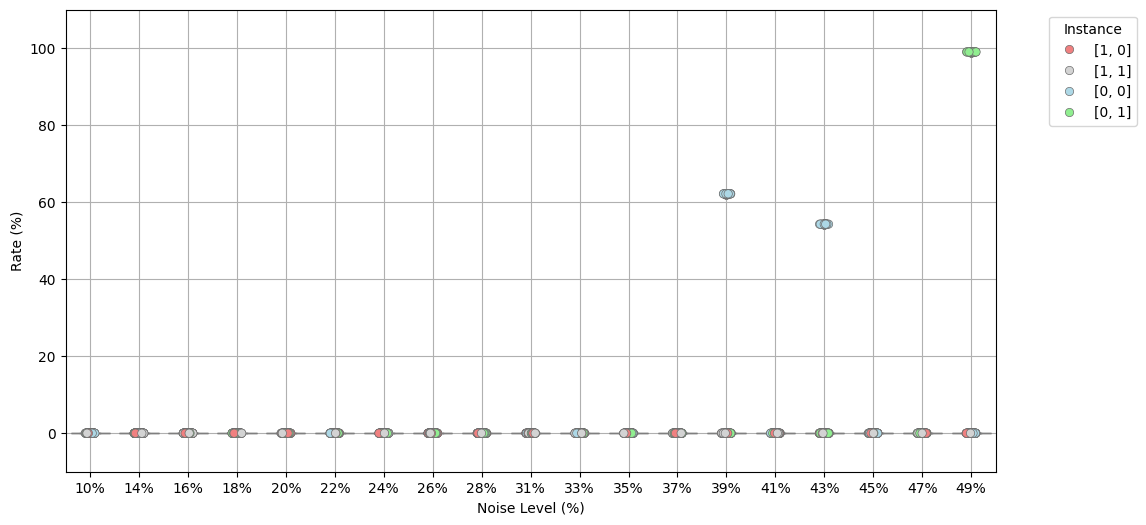

In [5]:
plot_metrics_boxplot(disagreement_rates, X_test)

In [66]:
m = 100# number of models
max_iter = 10000
d = 2  # number of dimensions

noise_type = "class_independent"

# Define the deterministic labels for each (x1, x2) pair
true_labels = {
    (0, 0): 0,
    (0, 1): 0,
    (1, 0): 1,
    (1, 1): 1
}

# Define the number of instances for each (x1, x2) pair
instances_counts = {
    (0, 0): 125,
    (0, 1): 125,
    (1, 0): 125,
    (1, 1): 125
}


# Define the number of instances for each (x1, x2) pair
p_y_x_dict = {
    (0, 0): np.array([0.8, 0.2]),
    (0, 1): np.array([0.8, 0.2]),
    (1, 0): np.array([0.2, 0.8]),
    (1, 1): np.array([0.2, 0.8])
}

# Example usage:
# Coefficients for the logistic model (bias, w1, w2)
#weights = calculate_weights(prob_labels)  # Replace with actual weights

# Generate dataset with probabilistic outcomes
X, y = generate_dataset(true_labels, instances_counts, probabilistic = True, p_y_x_dict=p_y_x_dict, seed=2024)

np.unique(y, return_counts=True)

(array([0, 1]), array([246, 254]))

In [9]:
[np.array([0]) + np.array([0])] + [0]

[array([0]), 0]

In [50]:
noise_levels = np.linspace(0.0, 0.49, num=10)


ambiguity_rates, disagreement_rates = generate_metrics_toy(noise_levels,m,max_iter, d, X, y, true_labels, instances_counts, noise_type = noise_type, probabilistic = True, p_y_x_dict = p_y_x_dict)


  0%|          | 0/10 [00:00<?, ?it/s]

1.0
0.8928571428571429
0.9900990099009901
1.0
1.0
1.0
1.0
1.0
1.0
1.0


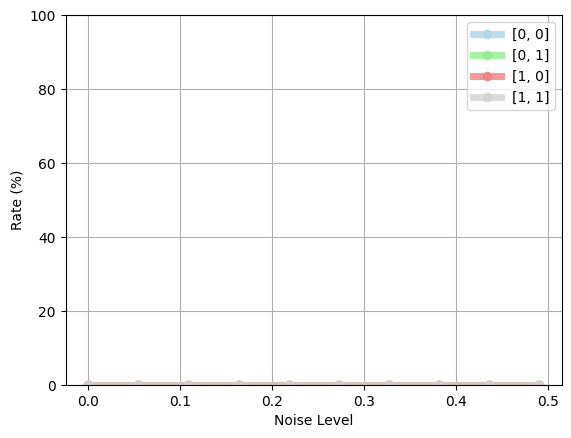

In [51]:
plot_metrics_toy(disagreement_rates, noise_levels)

In [52]:
ambiguity_rates

{'[0, 0]': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 '[0, 1]': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 '[1, 0]': [100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 '[1, 1]': [100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0]}